# Implementing PCA


In [1]:
#importing libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#loading preprocessed data
df = pd.read_csv('data/ml3_numeric_removed_na_rows.csv', encoding = 'ISO-8859-1')

In [3]:
#code for one hot encoding
def one_hot_encoding(dataframe, features=[]):

    for feature in features:
        temp_dataframe = pd.get_dummies(dataframe[feature], prefix=feature)
        dataframe = pd.concat([dataframe, temp_dataframe], axis=1)
        dataframe_dash = dataframe
        
    dataframe = dataframe.drop(columns=features)

    return dataframe

#code to decode one hot encoding
def one_hot_decoding(original_dataframe_features=None, encoded_dataframe=None):
    encoded_list = list(encoded_dataframe)
    
    encoded_feature_list = [x.split('_')[-1] for x in encoded_list]
    encoded_feature_list = np.array(encoded_feature_list, dtype='float')
    
    output = encoded_dataframe.values.astype(float)
    output = np.multiply(output, encoded_feature_list)
    
    decode_df = pd.DataFrame(output, columns=encoded_list)

    for feature in original_dataframe_features:
        l = [x for x in encoded_list if feature in x]
        decode_df[feature] = decode_df[l].max(axis=1)

    return decode_df.drop(columns=encoded_list)

In [4]:
df.shape

(2391, 182)

In [5]:
df.head()

,Participant_ID,RowNumber,session_id,age,backcount1,backcount10,backcount2,backcount3,backcount4,backcount5,backcount6,backcount7,backcount8,backcount9,big5_01,big5_02,big5_03,big5_04,big5_05,big5_06,big5_07,big5_08,big5_09,big5_10,elm_01,elm_02,elm_03,elm_04,elm_05,gender,intrinsic_01,intrinsic_02,intrinsic_03,intrinsic_04,intrinsic_05,intrinsic_06,intrinsic_07,intrinsic_08,intrinsic_09,intrinsic_10,intrinsic_11,intrinsic_12,intrinsic_13,intrinsic_14,intrinsic_15,kposition,kratio,lposition,lratio,mcdv1,mcdv2,mcfiller1,mcfiller2,mcfiller3,mood_01,mood_02,nfc_01,nfc_02,nfc_03,nfc_04,nfc_05,nfc_06,nposition,nratio,pate_01,pate_02,pate_03,pate_04,pate_05,rposition,rratio,sarcasm,selfesteem_01,stress_01,stress_02,stress_03,stress_04,tempest2,tempest3,tempfollowup1,tempfollowup2,tempfollowup3,vposition,vratio,year,Temperatureinlab,ClipboardWeight,IIResponse,SRConfidenceResponse,NumberofDays,Pool2a,Pool2b,Pool2c,Pool2d,Pool3,Pool4,Pool5a,Pool6,Pool7b,Pool7c,Pool7d,Pool8,Pool9,Pool10,Pool11,Pool12,Pool13,Pool14,Pool15,Pool16a,Pool16b,Pool17,Pool18,Pool19a,Pool19b,Persistence,anagrams_order,attention_order,availinstruct_order,availk_order,availl_order,availn_order,availr_order,availv_order,bigfive_order,debrief_order,demographics_order,elmques_order,filler1_order,filler2_order,galinskyvignette_order,inlab_order,intrinsic_order,mcfiller_order,moninvignette_order,mood_order,nfc_order,participantid_order,participation_order,selfesteem_order,startpage_order,stress_order,stroop_order,stroopinstructions_order,stroopinstructionstest_order,stroopprac_order,tempestimate_order,tempfollowup_order,welcome_order,MonthComputer,DayComputer,YearComputer,DaysSinceMonthComputer,DaysSinceAugComputer,DaysSinceMonthLab,DaysSinceAugLab,DaysSinceMonthStart,DaysSinceAugStart,DaysInComp,DaysInLab,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Intrinsic,Mood,NFC,ReportedAttention,ReportedEffort,SelfEsteem,Stress,K1st,L1st,N1st,R1st,V1st,AvailFirst,ArgumentQuality,NFCcenter,ELMCond,CBReject
0,12.0,170,7385046,19.0,357.0,330.0,354.0,351.0,348.0,345.0,342.0,339.0,336.0,333.0,5.0,3.0,6.0,5.0,5.0,3.0,5.0,1.0,5.0,5.0,7.0,7.0,7.0,6.0,6.0,1.0,3.0,2.0,2.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,14.0,2.0,18.0,0.0,3.0,1.0,0.0,2.0,3.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,1.0,6.0,4.0,4.0,1.0,1.0,1.0,2.0,15.0,4.0,4.0,3.0,2.0,3.0,4.0,6.0,2.0,7.0,7.0,6.0,1.0,3.0,2.0,74.0,20.0,6.0,5.0,92,1,0,0,0,3.0,0.25,0.0,0,0,0,0,1,1.0,1.0,3.0,15.0,160,500.0,30.0,1,0,1,0,1,0.125,113.000002,17.0,28.0,7,12,11,8,9,10,33.0,36.0,35.0,26,22,23,24,16.0,30.0,14,15,32.0,29.0,37.0,34.0,31.0,0,27.0,6.0,3,5.0,4,20,19,1,8,29,14,0,29,0.0,29.0,0,25,0.043478,0.043478,4.0,6.5,5.0,5.0,4.0,2.666667,5.0,2.500000,4.0,4.0,4.0,3.50,0.0,0.0,1.0,0.0,1.0,2.0,6.6,-0.682540,1,0.0
1,13.0,173,7385155,18.0,357.0,330.0,354.0,351.0,348.0,345.0,342.0,339.0,336.0,333.0,3.0,5.0,7.0,7.0,2.0,7.0,2.0,1.0,1.0,7.0,9.0,9.0,9.0,9.0,9.0,1.0,1.0,1.0,1.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,8654.0,0.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,5.0,1.0,3.0,2.0,1.0,1.0,5.0,5.0,1.0,1.0,2.0,1.0,8.0,3.0,1.0,4.0,2.0,2.0,5.0,6.0,4.0,7.0,7.0,1.0,1.0,8.0,1.0,74.0,10.0,7.0,5.0,92,1,0,0,0,3.0,0.25,0.0,0,0,0,0,1,1.0,1.0,3.0,15.0,160,500.0,30.0,1,0,1,0,1,0.125,153.999999,2.0,30.0,13,16,18,17,14,15,32.0,36.0,35.0,5,20,21,22,23.0,28.0,25,26,33.0,27.0,37.0,31.0,29.0,0,34.0,9.0,6,8.0,7,12,11,1,8,29,14,0,29,0.0,29.0,0,25,0.043478,0.043478,1.5,7.0,2.0,2.5,7.0,2.533333,7.0,2.333333,5.0,5.0,1.0,4.25,0.0,0.0,1.0,1.0,1.0,3.0,9.0,-0.849206,1,0.0
2,14.0,179,7391990,18.0,357.0,130.0,354.0,351.0,248.0,245.0,242.0,139.0,136.0,133.0,7.0,6.0,7.0,5.0,7.0,3.0,7.0,1.0,7.0,2.0,9.0,9.0,9.0,9.0,7.0,1.0,2.0,2.0,1.0,4.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,30.0,2.0,30.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,2.0,30.0,4.0,5.0,1.0,1.0,1.0,2.0,30.0,1.0,7.0,1.0,5.0,5.0,3.0,7.0,3.0,7.0,7.0,6.0,2.0,30.0,1.0,72.0,20.0,7.0,5.0,92,1,0,0,0,3.0,0.25,0.0,0,0,0,0,1,1.0,1.0,3.0,15.0,160,500.0,30.0,1,0,1,0,1,0.125,239.999993,26.0,

In [6]:
df.describe(include='all')

,Participant_ID,RowNumber,session_id,age,backcount1,backcount10,backcount2,backcount3,backcount4,backcount5,backcount6,backcount7,backcount8,backcount9,big5_01,big5_02,big5_03,big5_04,big5_05,big5_06,big5_07,big5_08,big5_09,big5_10,elm_01,elm_02,elm_03,elm_04,elm_05,gender,intrinsic_01,intrinsic_02,intrinsic_03,intrinsic_04,intrinsic_05,intrinsic_06,intrinsic_07,intrinsic_08,intrinsic_09,intrinsic_10,intrinsic_11,intrinsic_12,intrinsic_13,intrinsic_14,intrinsic_15,kposition,kratio,lposition,lratio,mcdv1,mcdv2,mcfiller1,mcfiller2,mcfiller3,mood_01,mood_02,nfc_01,nfc_02,nfc_03,nfc_04,nfc_05,nfc_06,nposition,nratio,pate_01,pate_02,pate_03,pate_04,pate_05,rposition,rratio,sarcasm,selfesteem_01,stress_01,stress_02,stress_03,stress_04,tempest2,tempest3,tempfollowup1,tempfollowup2,tempfollowup3,vposition,vratio,year,Temperatureinlab,ClipboardWeight,IIResponse,SRConfidenceResponse,NumberofDays,Pool2a,Pool2b,Pool2c,Pool2d,Pool3,Pool4,Pool5a,Pool6,Pool7b,Pool7c,Pool7d,Pool8,Pool9,Pool10,Pool11,Pool12,Pool13,Pool14,Pool15,Pool16a,Pool16b,Pool17,Pool18,Pool19a,Pool19b,Persistence,anagrams_order,attention_order,availinstruct_order,availk_order,availl_order,availn_order,availr_order,availv_order,bigfive_order,debrief_order,demographics_order,elmques_order,filler1_order,filler2_order,galinskyvignette_order,inlab_order,intrinsic_order,mcfiller_order,moninvignette_order,mood_order,nfc_order,participantid_order,participation_order,selfesteem_order,startpage_order,stress_order,stroop_order,stroopinstructions_order,stroopinstructionstest_order,stroopprac_order,tempestimate_order,tempfollowup_order,welcome_order,MonthComputer,DayComputer,YearComputer,DaysSinceMonthComputer,DaysSinceAugComputer,DaysSinceMonthLab,DaysSinceAugLab,DaysSinceMonthStart,DaysSinceAugStart,DaysInComp,DaysInLab,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Intrinsic,Mood,NFC,ReportedAttention,ReportedEffort,SelfEsteem,Stress,K1st,L1st,N1st,R1st,V1st,AvailFirst,ArgumentQuality,NFCcenter,ELMCond,CBReject
count,2.169000e+03,2391.000000,2.391000e+03,2335.000000,2.343000e+03,2340.000000,2.366000e+03,2365.000000,2361.000000,2.361000e+03,2.360000e+03,2.358000e+03,2.356000e+03,2.354000e+03,2360.000000,2364.000000,2364.000000,2363.000000,2364.000000,2364.000000,2364.000000,2363.000000,2364.000000,2364.000000,2365.000000,2365.000000,2360.000000,2364.000000,2358.000000,2342.000000,2353.000000,2355.000000,2354.000000,2352.000000,2352.000000,2352.000000,2353.000000,2354.000000,2354.000000,2353.000000,2352.000000,2353.000000,2354.000000,2350.000000,2354.000000,2312.000000,2287.000000,2331.000000,2284.000000,2387.000000,2384.000000,2385.000000,2383.000000,2350.000000,2370.000000,2370.000000,2346.000000,2360.000000,2359.000000,2359.000000,2357.000000,2357.000000,2332.000000,2279.000000,2363.000000,2365.000000,2363.000000,2361.000000,2360.000000,2328.000000,2284.000000,2385.000000,2360.000000,2363.000000,2364.000000,2363.000000,2364.000000,2384.000000,2383.000000,2381.000000,2379.000000,2380.000000,2329.000000,2267.000000,2341.000000,1995.000000,2152.000000,2136.00000,2141.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,1964.000000,2391.000000,2297.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2049.000000,2143.0,2023.000000,2317.000000,2391.000000,2181.000000,1929.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,1618.000000,2386.000000,2390.00000,2377.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2391.000000,2375.000000,2360.0,2363.0,2391.000000,2391.000000,2391.000000,2391.000000,2390.000000,2376.000000,2391.000000,2391.000000,2376.000000,2373.000000,2295.0,2375.000000,2377.000000,2391.0,2376.000000,2389.000000,2391.000000,2390.000000,2391.000000,2391.000000,2391.000000,2391.0,2391.000000,2391.000000,2391.0,2391.000000,2391.000000,2072.000000,2072.000000,2391.000000,2391.000000,2391.000000,2072.000000,2364.000000,2363.000000,2360.000000,2364.000000,2363.000000,2343.000000,2370.000000,2340.000

In [7]:
len(df), len(df.dropna())

(2391, 689)

In [8]:
dfcorr = df.corr()
dfcorr

,Participant_ID,RowNumber,session_id,age,backcount1,backcount10,backcount2,backcount3,backcount4,backcount5,backcount6,backcount7,backcount8,backcount9,big5_01,big5_02,big5_03,big5_04,big5_05,big5_06,big5_07,big5_08,big5_09,big5_10,elm_01,elm_02,elm_03,elm_04,elm_05,gender,intrinsic_01,intrinsic_02,intrinsic_03,intrinsic_04,intrinsic_05,intrinsic_06,intrinsic_07,intrinsic_08,intrinsic_09,intrinsic_10,intrinsic_11,intrinsic_12,intrinsic_13,intrinsic_14,intrinsic_15,kposition,kratio,lposition,lratio,mcdv1,mcdv2,mcfiller1,mcfiller2,mcfiller3,mood_01,mood_02,nfc_01,nfc_02,nfc_03,nfc_04,nfc_05,nfc_06,nposition,nratio,pate_01,pate_02,pate_03,pate_04,pate_05,rposition,rratio,sarcasm,selfesteem_01,stress_01,stress_02,stress_03,stress_04,tempest2,tempest3,tempfollowup1,tempfollowup2,tempfollowup3,vposition,vratio,year,Temperatureinlab,ClipboardWeight,IIResponse,SRConfidenceResponse,NumberofDays,Pool2a,Pool2b,Pool2c,Pool2d,Pool3,Pool4,Pool5a,Pool6,Pool7b,Pool7c,Pool7d,Pool8,Pool9,Pool10,Pool11,Pool12,Pool13,Pool14,Pool15,Pool16a,Pool16b,Pool17,Pool18,Pool19a,Pool19b,Persistence,anagrams_order,attention_order,availinstruct_order,availk_order,availl_order,availn_order,availr_order,availv_order,bigfive_order,debrief_order,demographics_order,elmques_order,filler1_order,filler2_order,galinskyvignette_order,inlab_order,intrinsic_order,mcfiller_order,moninvignette_order,mood_order,nfc_order,participantid_order,participation_order,selfesteem_order,startpage_order,stress_order,stroop_order,stroopinstructions_order,stroopinstructionstest_order,stroopprac_order,tempestimate_order,tempfollowup_order,welcome_order,MonthComputer,DayComputer,YearComputer,DaysSinceMonthComputer,DaysSinceAugComputer,DaysSinceMonthLab,DaysSinceAugLab,DaysSinceMonthStart,DaysSinceAugStart,DaysInComp,DaysInLab,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Intrinsic,Mood,NFC,ReportedAttention,ReportedEffort,SelfEsteem,Stress,K1st,L1st,N1st,R1st,V1st,AvailFirst,ArgumentQuality,NFCcenter,ELMCond,CBReject
Participant_ID,1.000000,-0.032211,0.018149,-0.004417,-0.001630,-0.019256,-0.001763,-0.001575,-0.001642,-0.001617,-0.002090,-0.001620,-0.001946,-0.001642,0.005034,-0.016542,0.014658,-0.023732,0.024882,0.010012,0.037045,0.049433,0.019234,0.002561,0.030348,0.005720,-0.017587,0.015868,-0.013093,-0.021346,0.022389,0.039720,0.037161,0.008862,0.009809,-0.041946,-0.033389,0.013078,0.026166,0.025037,-0.016028,0.013449,-0.001480,0.017481,-0.017206,-0.000213,-0.004063,0.021327,-0.002061,-0.015294,0.033755,-0.029509,-0.029314,0.020024,0.004527,0.011700,0.011362,-0.037473,-0.036610,-0.011397,0.010138,-0.002898,0.029463,-0.017734,0.004323,-0.016598,-0.036406,0.019137,-0.045495,0.022611,-0.011183,-0.000844,0.017355,0.009966,-0.002292,-0.007820,-0.009306,0.004458,-0.021590,-0.027083,-0.025367,0.017889,-0.013690,-0.020990,0.009402,0.161605,0.008829,-0.018675,0.024139,-0.097451,0.025585,0.024258,0.131777,-0.015223,-0.004734,-0.002228,0.006197,-0.018416,0.031695,0.096033,0.120194,0.086489,0.034100,NaN,0.021082,-0.032329,0.038884,0.041918,0.037773,-0.221054,0.118038,-0.048565,0.048767,0.040282,-0.015940,-0.022428,-0.004789,-0.015907,0.022404,0.019522,0.030984,0.012156,0.031302,0.015277,-0.029479,NaN,NaN,-0.022045,-0.015456,-0.015456,-0.015456,-0.017857,-0.006742,0.012221,0.012221,0.003485,-0.002675,NaN,-0.006278,0.052083,NaN,0.005845,0.011379,0.011379,0.011379,0.011379,-0.018082,-0.018082,NaN,-0.033709,-0.028602,NaN,-0.034084,-0.047054,0.616402,0.647730,0.095508,0.100572,-0.090363,0.634012,0.011312,-0.027262,-0.004154,0.032820,-0.025038,0.035341,-0.008435,0.025874,0.004323,-0.016598,0.017355,0.003055,0.000213,-0.021327,-0.029463,-0.022611,0.013690,-0.025431,0.004694,0.025874,0.010235,0.042150
RowNumber,-0.032211,1.000000,0.454953,0.041246,-0.034595,0.020683,-0.023983,-0.002220,0.031612,0.031492,-0.027052,0.031490,-0.021492,-0.008621,-0.006106,-0.030176,-0.052579,-0.051491,0.007901,-0.043472,-0.012071,0.079597,0.019487,0.039341,0.012733,-0.016833,0.004480,0.035188,-0.001224,0.

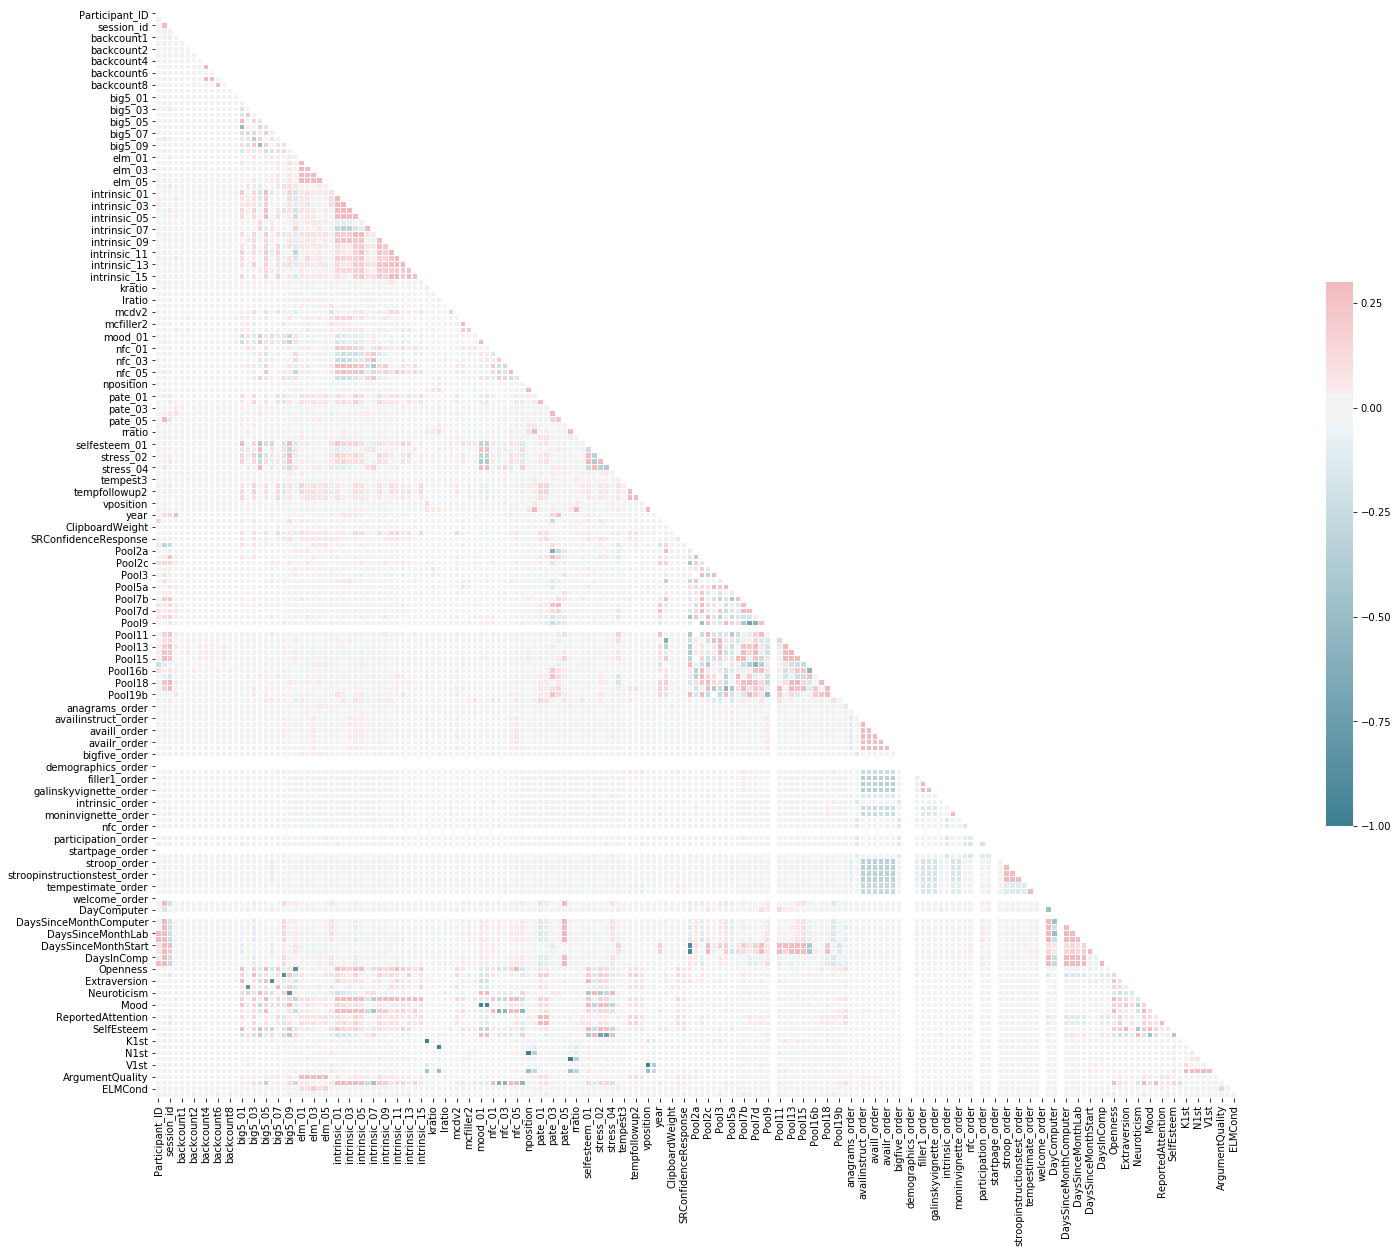

In [11]:
corr = dfcorr

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig('correlation.jpg')

In [13]:
rownum_correlation = dfcorr[dfcorr['RowNumber'] > 0.5].index
rownum_correlation

Index(['RowNumber', 'MonthComputer', 'DaysSinceMonthComputer',
       'DaysSinceAugComputer', 'DaysSinceMonthLab', 'DaysSinceAugLab',
       'DaysInComp', 'DaysInLab'],
      dtype='object')

In [32]:
rownum_correlation = dfcorr[dfcorr['RowNumber'] < -.3].index
rownum_correlation

Index(['NumberofDays'], dtype='object')

In [14]:
dfsubset = df[list(dfcorr)]
dfsubset.shape

(2391, 182)

# PCA Algorithm

In [15]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = np.nan_to_num(dfsubset.values)
X_std = StandardScaler().fit_transform(X)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the eigenvalue, eigenvector pair from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:827: ComplexWarning:

Casting complex values to real discards the imaginary part



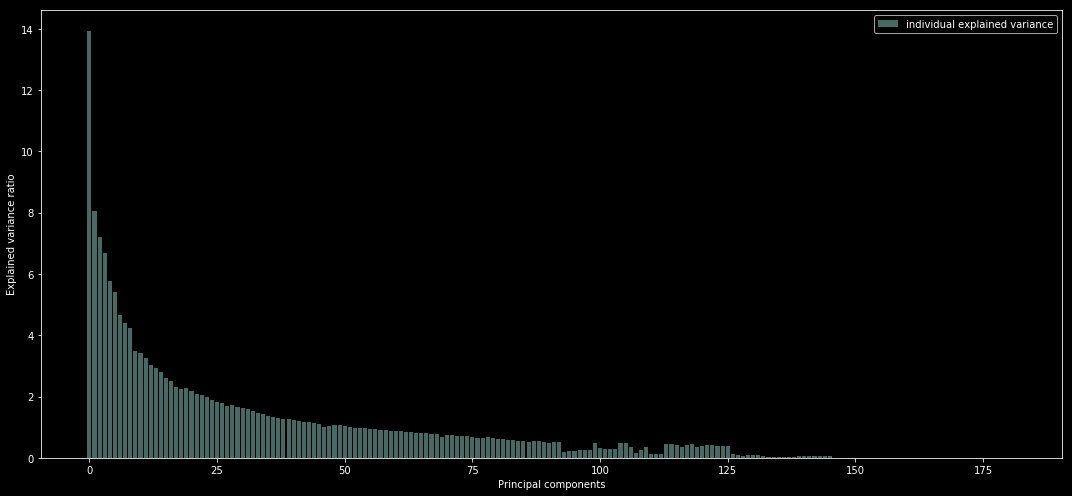

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

with plt.style.context('dark_background'):
    plt.figure(figsize=(15, 7))
    plt.bar(range(len(eig_vals)), eig_vals, alpha=0.5, align='center', label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('pca.jpg')

In [22]:
#relevent features; which has high eigen values 
pca = list(df)[:125]
other = list(df)[125:]
print(pca)

['Participant_ID', 'RowNumber', 'session_id', 'age', 'backcount1', 'backcount10', 'backcount2', 'backcount3', 'backcount4', 'backcount5', 'backcount6', 'backcount7', 'backcount8', 'backcount9', 'big5_01', 'big5_02', 'big5_03', 'big5_04', 'big5_05', 'big5_06', 'big5_07', 'big5_08', 'big5_09', 'big5_10', 'elm_01', 'elm_02', 'elm_03', 'elm_04', 'elm_05', 'gender', 'intrinsic_01', 'intrinsic_02', 'intrinsic_03', 'intrinsic_04', 'intrinsic_05', 'intrinsic_06', 'intrinsic_07', 'intrinsic_08', 'intrinsic_09', 'intrinsic_10', 'intrinsic_11', 'intrinsic_12', 'intrinsic_13', 'intrinsic_14', 'intrinsic_15', 'kposition', 'kratio', 'lposition', 'lratio', 'mcdv1', 'mcdv2', 'mcfiller1', 'mcfiller2', 'mcfiller3', 'mood_01', 'mood_02', 'nfc_01', 'nfc_02', 'nfc_03', 'nfc_04', 'nfc_05', 'nfc_06', 'nposition', 'nratio', 'pate_01', 'pate_02', 'pate_03', 'pate_04', 'pate_05', 'rposition', 'rratio', 'sarcasm', 'selfesteem_01', 'stress_01', 'stress_02', 'stress_03', 'stress_04', 'tempest2', 'tempest3', 'tempf

In [34]:
#less relevant features
print(other)

['debrief_order', 'demographics_order', 'elmques_order', 'filler1_order', 'filler2_order', 'galinskyvignette_order', 'inlab_order', 'intrinsic_order', 'mcfiller_order', 'moninvignette_order', 'mood_order', 'nfc_order', 'participantid_order', 'participation_order', 'selfesteem_order', 'startpage_order', 'stress_order', 'stroop_order', 'stroopinstructions_order', 'stroopinstructionstest_order', 'stroopprac_order', 'tempestimate_order', 'tempfollowup_order', 'welcome_order', 'MonthComputer', 'DayComputer', 'YearComputer', 'DaysSinceMonthComputer', 'DaysSinceAugComputer', 'DaysSinceMonthLab', 'DaysSinceAugLab', 'DaysSinceMonthStart', 'DaysSinceAugStart', 'DaysInComp', 'DaysInLab', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'Intrinsic', 'Mood', 'NFC', 'ReportedAttention', 'ReportedEffort', 'SelfEsteem', 'Stress', 'K1st', 'L1st', 'N1st', 'R1st', 'V1st', 'AvailFirst', 'ArgumentQuality', 'NFCcenter', 'ELMCond', 'CBReject']
